In [1]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

In [2]:
class pt:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def distance(target, other):
    dist = (target.x - other.x)**2 + (target.y-other.y)**2
    return np.round(math.sqrt(dist), 4)
  def direction(target, other, num_of_pieces=8):
    y = other.y - target.y
    x = other.x - target.x
    theta = (round(np.arctan2(y, x)/math.pi*180,4))
    if theta < 0:
      theta = theta + 360
    a_pieces = 360 / num_of_pieces
    dir = int(theta / a_pieces)
    return dir

In [3]:
df = pd.read_csv('./8415.csv')
df

,frame_id,agent_id,pos_x,pos_y,vel_x,vel_y,scene_id,label,timestamp
0,8415,175,9.980143,4.572062,1.476375,0.507968,0,pedestrian,561.0
1,8415,174,7.763284,7.360106,1.511990,-0.460956,0,pedestrian,561.0
2,8415,176,6.372150,6.453113,-2.083991,0.219128,0,pedestrian,561.0
3,8415,177,3.600584,7.471539,1.610575,0.165052,0,pedestrian,561.0
4,8415,178,2.991217,5.585358,1.698295,0.094163,0,pedestrian,561.0
5,8415,179,2.910753,4.439162,1.520995,0.070057,0,pedestrian,561.0
6,8415,182,0.574332,5.912362,1.863154,0.030781,0,pedestrian,561.0
7,8415,184,0.114369,7.249820,1.762417,0.175632,0,pedestrian,561.0
8,8415,183,-0.315940,6.455145,1.890560,-0.151986,0,pedestrian,561.0
9,8415,181,0.436485,4.825554,1.486574,0.011782,0,pedestrian,561.0


In [4]:
num_of_pieces = 360
max_dist = 8
target_id = 4

target = df.iloc[target_id]
target_pt = pt(target[2],target[3])


In [5]:
surrounding = np.ones(num_of_pieces)
for i in range(0,len(df)):
  if i == target_id:
    continue
  else:
    pass
  other = df.iloc[i]
  other_pt = pt(other[2],other[3])
  # plt.scatter(other[2],other[3])
  # plt.text(other[2],other[3], i)
  dist = pt.distance(target_pt, other_pt)
  dist = np.round(dist / max_dist, 4)
  if dist > 1:
    continue
  else:
    pass
  dir = pt.direction(target_pt, other_pt, num_of_pieces)
  if dist < surrounding[dir]:
    surrounding[dir] = dist
  print('target:', target_id, target[2],target[3],'\tother:', i,'\t', other[2],'\t',other[3],'\tdir:', dir,'\tdist:', dist)
# print(surrounding)

  

target: 4 2.9912171 5.5853583 	other: 0 	 9.9801433 	 4.5720616 	dir: 351 	dist: 0.8828
target: 4 2.9912171 5.5853583 	other: 1 	 7.7632837 	 7.3601056 	dir: 20 	dist: 0.6364
target: 4 2.9912171 5.5853583 	other: 2 	 6.37215 	 6.453113 	dir: 14 	dist: 0.4363
target: 4 2.9912171 5.5853583 	other: 3 	 3.6005836 	 7.4715391 	dir: 72 	dist: 0.2478
target: 4 2.9912171 5.5853583 	other: 5 	 2.9107534 	 4.4391616 	dir: 265 	dist: 0.1436
target: 4 2.9912171 5.5853583 	other: 6 	 0.5743322 	 5.9123615 	dir: 172 	dist: 0.3049
target: 4 2.9912171 5.5853583 	other: 7 	 0.11436912 	 7.2498201 	dir: 149 	dist: 0.4155
target: 4 2.9912171 5.5853583 	other: 8 	 -0.31593993 	 6.4551447 	dir: 165 	dist: 0.4274
target: 4 2.9912171 5.5853583 	other: 9 	 0.43648452 	 4.8255543 	dir: 196 	dist: 0.3332
target: 4 2.9912171 5.5853583 	other: 10 	 0.75278218 	 4.2690331 	dir: 210 	dist: 0.3246
target: 4 2.9912171 5.5853583 	other: 11 	 -2.8283746 	 7.989659 	dir: 157 	dist: 0.7871


In [6]:
test_lb = np.zeros(num_of_pieces)
for i in range(num_of_pieces):
  test_lb[i] = i

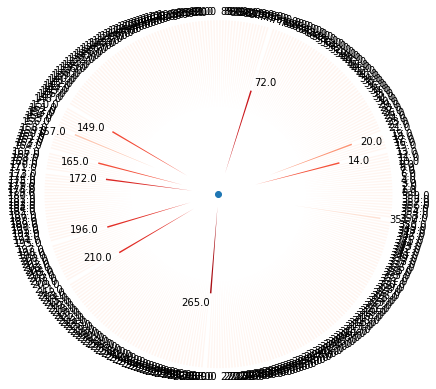

In [7]:
cmap = plt.get_cmap("Reds")
color = cmap(np.array(np.abs(surrounding-1)))
plt.pie(np.ones(num_of_pieces),
        explode = surrounding,
        # labels = surrounding,
        labels = test_lb,
        colors = color,
        textprops = {"fontsize" : 10})
plt.scatter(0,0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

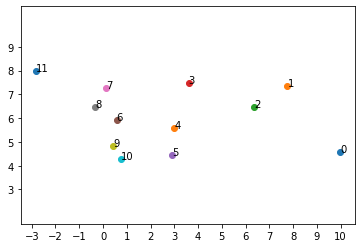

In [8]:
for i in range(0,len(df)):
  if i == target_id:
    continue
  else:
    pass
  other = df.iloc[i]
  other_pt = pt(other[2],other[3])
  plt.scatter(other[2],other[3])
  plt.text(other[2],other[3], i)
  dist = pt.distance(target_pt, other_pt)
  dist = np.round(dist / max_dist, 4)
  if dist > 1:
    continue
  else:
    pass
  dir = pt.direction(target_pt, other_pt, num_of_pieces)
  if dist < surrounding[dir]:
    surrounding[dir] = dist
plt.scatter(target[2], target[3])
plt.xticks([x for x in range(-4,12)])
plt.yticks([y for y in range(3,10)])
plt.axis('equal')
plt.text(target[2],target[3], target_id)
plt.show